In [1]:
# ALL THE IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import warnings

In [2]:
data = pd.read_csv("Open_Univ_Data_Final_merged.csv")
datac = pd.read_csv("Open_Univ_Data_Final_merged.csv")

In [3]:
data.set_index('id_student',inplace=True)

In [4]:
data.head()

code_module code_presentation gender                region  \
id_student                                                              
11391              AAA             2013J      M   East Anglian Region   
28400              AAA             2013J      F              Scotland   
31604              AAA             2013J      F     South East Region   
32885              AAA             2013J      F  West Midlands Region   
38053              AAA             2013J      M                 Wales   

                highest_education  imd_band age_band  num_of_prev_attempts  \
id_student                                                                   
11391            HE Qualification      10.0     55<=                     0   
28400            HE Qualification       3.0    35-55                     0   
31604       A Level or Equivalent       6.0    35-55                     0   
32885          Lower Than A Level       6.0     0-35                     0   
38053       A Level or Equivalent       9.0    35-55                     0   

            studied_credits disability  ...  quiz  repeatactivity  resource  \
id_student                              ...                                   
11391                   240          N  ...   0.0             0.0      13.0   
28400                    60          N  ...   0.0             0.0      12.0   
31604                    60          N  ...   0.0             0.0      19.0   
32885                    60          N  ...   0.0             0.0      45.0   
38053                    60          N  ...   0.0             0.0      11.0   

            sharedsubpage  subpage   url  sum_click  days_interacted  \
id_student                                                             
11391                 0.0     32.0   5.0        934               40   
28400                 0.0     87.0  48.0       1435               80   
31604                 0.0    144.0  90.0       2158              123   
32885                 0.0     79.0  14.0       1034               70   
38053                 0.0     91.0  45.0       2445              143   

           daily_click  final_result  
id_student                            
11391        23.350000          Pass  
28400        17.937500          Pass  
31604        17.544715          Pass  
32885        14.771429          Pass  
38053        17.097902          Pass  

[5 rows x 43 columns]

In [5]:
data.drop(columns=['date_unregistration', 'Exam_score','TMA_score','CMA_score','mean_score','registration_before','unique' ], inplace=True)
# data.drop(columns=['quiz','repeatactivity','resource','sharedsubpage','url'], inplace=True)
# data.drop(columns=['oucontent','ouelluminate','ouwiki','page','questionnaire'], inplace=True)
# data.drop(columns=['htmlactivity','oucollaborate','externalquiz','folder'], inplace=True)
data = data.replace(to_replace='55<=', value = '55')
data.head()

code_module code_presentation gender                region  \
id_student                                                              
11391              AAA             2013J      M   East Anglian Region   
28400              AAA             2013J      F              Scotland   
31604              AAA             2013J      F     South East Region   
32885              AAA             2013J      F  West Midlands Region   
38053              AAA             2013J      M                 Wales   

                highest_education  imd_band age_band  num_of_prev_attempts  \
id_student                                                                   
11391            HE Qualification      10.0       55                     0   
28400            HE Qualification       3.0    35-55                     0   
31604       A Level or Equivalent       6.0    35-55                     0   
32885          Lower Than A Level       6.0     0-35                     0   
38053       A Level or Equivalent       9.0    35-55                     0   

            studied_credits disability  ...  quiz  repeatactivity  resource  \
id_student                              ...                                   
11391                   240          N  ...   0.0             0.0      13.0   
28400                    60          N  ...   0.0             0.0      12.0   
31604                    60          N  ...   0.0             0.0      19.0   
32885                    60          N  ...   0.0             0.0      45.0   
38053                    60          N  ...   0.0             0.0      11.0   

            sharedsubpage  subpage   url  sum_click  days_interacted  \
id_student                                                             
11391                 0.0     32.0   5.0        934               40   
28400                 0.0     87.0  48.0       1435               80   
31604                 0.0    144.0  90.0       2158              123   
32885                 0.0     79.0  14.0       1034               70   
38053                 0.0     91.0  45.0       2445              143   

            daily_click  final_result  
id_student                             
11391         23.350000          Pass  
28400         17.937500          Pass  
31604         17.544715          Pass  
32885         14.771429          Pass  
38053         17.097902          Pass  

[5 rows x 36 columns]

In [6]:
# data.drop(columns=['dualpane','glossary','date_registration_pos'], inplace=True)
data.head()


code_module code_presentation gender                region  \
id_student                                                              
11391              AAA             2013J      M   East Anglian Region   
28400              AAA             2013J      F              Scotland   
31604              AAA             2013J      F     South East Region   
32885              AAA             2013J      F  West Midlands Region   
38053              AAA             2013J      M                 Wales   

                highest_education  imd_band age_band  num_of_prev_attempts  \
id_student                                                                   
11391            HE Qualification      10.0       55                     0   
28400            HE Qualification       3.0    35-55                     0   
31604       A Level or Equivalent       6.0    35-55                     0   
32885          Lower Than A Level       6.0     0-35                     0   
38053       A Level or Equivalent       9.0    35-55                     0   

            studied_credits disability  ...  quiz  repeatactivity  resource  \
id_student                              ...                                   
11391                   240          N  ...   0.0             0.0      13.0   
28400                    60          N  ...   0.0             0.0      12.0   
31604                    60          N  ...   0.0             0.0      19.0   
32885                    60          N  ...   0.0             0.0      45.0   
38053                    60          N  ...   0.0             0.0      11.0   

            sharedsubpage  subpage   url  sum_click  days_interacted  \
id_student                                                             
11391                 0.0     32.0   5.0        934               40   
28400                 0.0     87.0  48.0       1435               80   
31604                 0.0    144.0  90.0       2158              123   
32885                 0.0     79.0  14.0       1034               70   
38053                 0.0     91.0  45.0       2445              143   

            daily_click  final_result  
id_student                             
11391         23.350000          Pass  
28400         17.937500          Pass  
31604         17.544715          Pass  
32885         14.771429          Pass  
38053         17.097902          Pass  

[5 rows x 36 columns]

In [7]:
data = data.dropna()
data.final_result.value_counts()
data = data.replace(to_replace ="Distinction", value ="Pass")
data = data.replace(to_replace ="Withdrawn", value ="Fail")


In [8]:
train_cols = data.columns[0:-1]
label = data.columns[-1]

In [9]:
X = data[train_cols]
X.head()

code_module code_presentation gender                region  \
id_student                                                              
11391              AAA             2013J      M   East Anglian Region   
28400              AAA             2013J      F              Scotland   
31604              AAA             2013J      F     South East Region   
32885              AAA             2013J      F  West Midlands Region   
38053              AAA             2013J      M                 Wales   

                highest_education  imd_band age_band  num_of_prev_attempts  \
id_student                                                                   
11391            HE Qualification      10.0       55                     0   
28400            HE Qualification       3.0    35-55                     0   
31604       A Level or Equivalent       6.0    35-55                     0   
32885          Lower Than A Level       6.0     0-35                     0   
38053       A Level or Equivalent       9.0    35-55                     0   

            studied_credits disability  ...  questionnaire  quiz  \
id_student                              ...                        
11391                   240          N  ...            0.0   0.0   
28400                    60          N  ...            0.0   0.0   
31604                    60          N  ...            0.0   0.0   
32885                    60          N  ...            0.0   0.0   
38053                    60          N  ...            0.0   0.0   

            repeatactivity  resource  sharedsubpage  subpage   url  sum_click  \
id_student                                                                      
11391                  0.0      13.0            0.0     32.0   5.0        934   
28400                  0.0      12.0            0.0     87.0  48.0       1435   
31604                  0.0      19.0            0.0    144.0  90.0       2158   
32885                  0.0      45.0            0.0     79.0  14.0       1034   
38053                  0.0      11.0            0.0     91.0  45.0       2445   

            days_interacted  daily_click  
id_student                                
11391                    40    23.350000  
28400                    80    17.937500  
31604                   123    17.544715  
32885                    70    14.771429  
38053                   143    17.097902  

[5 rows x 35 columns]

In [10]:
y = data[label].apply(lambda x: 1 if x == "Pass" else 0)
y.head()

id_student
11391    1
28400    1
31604    1
32885    1
38053    1
Name: final_result, dtype: int64

In [11]:
seed = 1
X_enc = pd.get_dummies(X, prefix_sep='.')
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_enc, y, test_size=0.25, random_state=seed)
X_enc.head()

imd_band  num_of_prev_attempts  studied_credits  \
id_student                                                    
11391           10.0                     0              240   
28400            3.0                     0               60   
31604            6.0                     0               60   
32885            6.0                     0               60   
38053            9.0                     0               60   

            date_registration  date_registration_pos  dataplus  dualpane  \
id_student                                                                 
11391                  -159.0                  159.0       0.0       0.0   
28400                   -53.0                   53.0      10.0       0.0   
31604                   -52.0                   52.0       2.0       0.0   
32885                  -176.0                  176.0       0.0       0.0   
38053                  -110.0                  110.0       7.0       0.0   

            externalquiz  folder  forumng  ...  \
id_student                                 ...   
11391                0.0     0.0    193.0  ...   
28400                0.0     0.0    417.0  ...   
31604                0.0     0.0    634.0  ...   
32885                0.0     0.0    194.0  ...   
38053                0.0     0.0    875.0  ...   

            highest_education.A Level or Equivalent  \
id_student                                            
11391                                             0   
28400                                             0   
31604                                             1   
32885                                             0   
38053                                             1   

            highest_education.HE Qualification  \
id_student                                       
11391                                        1   
28400                                        1   
31604                                        0   
32885                                        0   
38053                                        0   

            highest_education.Lower Than A Level  \
id_student                                         
11391                                          0   
28400                                          0   
31604                                          0   
32885                                          1   
38053                                          0   

            highest_education.No Formal quals  \
id_student                                      
11391                                       0   
28400                                       0   
31604                                       0   
32885                                       0   
38053                                       0   

            highest_education.Post Graduate Qualification  age_band.0-35  \
id_student                                                                 
11391                                                   0              0   
28400                                                   0              0   
31604                                                   0              0   
32885                                                   0              1   
38053                                                   0              0   

            age_band.35-55  age_band.55  disability.N  disability.Y  
id_student                                                           
11391                    0            1             1             0  
28400                    1            0             1             0  
31604                    1            0             1             0  
32885                    0            0             1             0  
38053                    1            0             1             0  

[5 rows x 64 columns]

In [12]:
sc = StandardScaler()
sc.fit(X_train_enc)
X_train_std = sc.transform(X_train_enc)
X_test_std = sc.transform(X_test_enc)


/home/deepti/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/deepti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/deepti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [13]:
# param_grid = { 
#     'n_estimators': [100, 500, 800, 1100],
#     'max_depth' : [10,20,30,50],
# #    'max_features': ['auto', 'sqrt', 'log2'],
#     'criterion' :['gini', 'entropy']
# }
# print("running")
# CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train_std, y_train)
# print(CV_rfc.best_params_)


## Result from previous commands : n_Estimator = 500, max_depth = 20, criterion = 'entropy'

In [14]:
# rf = RandomForestClassifier( n_estimators=500, max_depth = 33, criterion = 'entropy', random_state = 0).fit(X_train_std, y_train)

In [15]:
# accuracy = accuracy_score(y_test, rf.predict(X_test_std))
# accuracy

In [16]:
# dt = tree.DecisionTreeClassifier(criterion='gini')
# dt = dt.fit(X_train_std, y_train)
# train_pred = dt.predict(X_train_std)
# test_pred = dt.predict(X_test_std)

# print("Accuracy: {0:.3f}".format(accuracy_score(y_test, test_pred)),"\n")

In [17]:
from sklearn.preprocessing import Imputer
from sklearn.model_selection import  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

In [18]:
from skll.metrics import spearman
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


In [19]:
sns.set(style="white", palette="colorblind", font_scale=1.2, 
        rc={"figure.figsize":(12,9)})
RANDOM_STATE = 420
N_JOBS=8


In [20]:
pipe = Pipeline([("imputer", Imputer()),
                 ("estimator", RandomForestClassifier(random_state=RANDOM_STATE))])

/home/deepti/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
# We use spearman's rank correlation as the scoring metric since
# we are concerned with ranking the players
spearman_scorer = make_scorer(spearman)

# the hyperparamters to search over, including different imputation strategies
rf_param_space = {
    'imputer__strategy': Categorical(['mean', 'median', 'most_frequent']),
    'estimator__max_features': Integer(1, 8),
    'estimator__n_estimators': Integer(50, 500), 
    'estimator__min_samples_split': Integer(2, 200),
}
# create our search object
search = BayesSearchCV(pipe, 
                      rf_param_space, 
                      cv=10,
                      n_jobs=N_JOBS, 
                      verbose=0, 
                      error_score=-9999, 
                      scoring=spearman_scorer, 
                      random_state=RANDOM_STATE,
                      return_train_score=True, 
                      n_iter=3)

In [22]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    search.fit(X_train_std, y_train) 
search.best_params_

{'estimator__max_features': 7,
 'estimator__min_samples_split': 93,
 'estimator__n_estimators': 137,
 'imputer__strategy': 'mean'}

In [23]:
predicted = search.predict(X_test_std)
model_test_score = spearman_scorer(search, X_test_std, y_test)
model_test_score
# estimator = pipe.best_estimator_.named_steps['estimator']

0.6657551627501685

In [24]:
estimator = search.best_estimator_.named_steps['estimator']
imputer = search.best_estimator_.named_steps['imputer']
estimator.feature_importances_

array([5.16313716e-03, 2.60859867e-03, 8.50546859e-03, 5.73563874e-03,
       5.75339102e-03, 1.20032563e-02, 4.16295533e-03, 9.66329028e-03,
       8.15680501e-03, 4.48520974e-02, 8.38266508e-03, 9.50151546e-02,
       3.52617879e-03, 1.39702060e-02, 5.44874871e-02, 3.34965428e-03,
       2.55971832e-02, 1.83936178e-02, 7.80436013e-03, 1.09065433e-01,
       1.01705237e-04, 4.66729515e-02, 5.17109371e-04, 3.47523373e-02,
       3.35573479e-02, 1.03805546e-01, 1.82750027e-01, 2.26258638e-02,
       2.40246843e-03, 1.88206101e-02, 1.08461004e-02, 6.40003883e-03,
       3.37325729e-03, 2.31924048e-02, 1.78757890e-02, 2.38330772e-03,
       1.60869290e-03, 7.12759994e-04, 3.04955945e-03, 7.74684942e-03,
       1.05957544e-02, 5.32702839e-04, 4.42929108e-04, 6.10072284e-04,
       5.71868904e-04, 4.03270473e-04, 6.19942655e-04, 6.13059917e-04,
       3.83673910e-04, 4.68923726e-04, 4.61643693e-04, 5.47601764e-04,
       4.75697383e-04, 4.30364260e-04, 2.36153757e-03, 5.40149481e-04,
      

In [25]:
import eli5
features = list(X_enc.columns)
print(features)

['imd_band', 'num_of_prev_attempts', 'studied_credits', 'date_registration', 'date_registration_pos', 'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url', 'sum_click', 'days_interacted', 'daily_click', 'code_module.AAA', 'code_module.BBB', 'code_module.CCC', 'code_module.DDD', 'code_module.EEE', 'code_module.FFF', 'code_module.GGG', 'code_presentation.2013B', 'code_presentation.2013J', 'code_presentation.2014B', 'code_presentation.2014J', 'gender.F', 'gender.M', 'region.East Anglian Region', 'region.East Midlands Region', 'region.Ireland', 'region.London Region', 'region.North Region', 'region.North Western Region', 'region.Scotland', 'region.South East Region', 'region.South Region', 'region.South West Region', 'region.Wales', 'region.West Midlands Region', 'region.Yorkshire Region', 'h

In [26]:
feat_imp_df = eli5.explain_weights_df(estimator, feature_names=features)
feat_imp_df.head(15)


feature    weight       std
0   days_interacted  0.182750  0.152963
1              quiz  0.109065  0.071645
2         sum_click  0.103806  0.124011
3          homepage  0.095015  0.124775
4         oucontent  0.054487  0.059195
5          resource  0.046673  0.062289
6           forumng  0.044852  0.064427
7           subpage  0.034752  0.041836
8               url  0.033557  0.046238
9            ouwiki  0.025597  0.025300
10  code_module.FFF  0.023192  0.019321
11      daily_click  0.022626  0.010138
12  code_module.BBB  0.018821  0.013675
13             page  0.018394  0.012542
14  code_module.GGG  0.017876  0.014216

In [27]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from io import StringIO  

In [28]:
depths2 = [tree for tree in estimator.estimators_]
print(len(depths2))

137


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=93, min_weight_fraction_leaf=0.0,
            presort=False, random_state=464520377, splitter='best')


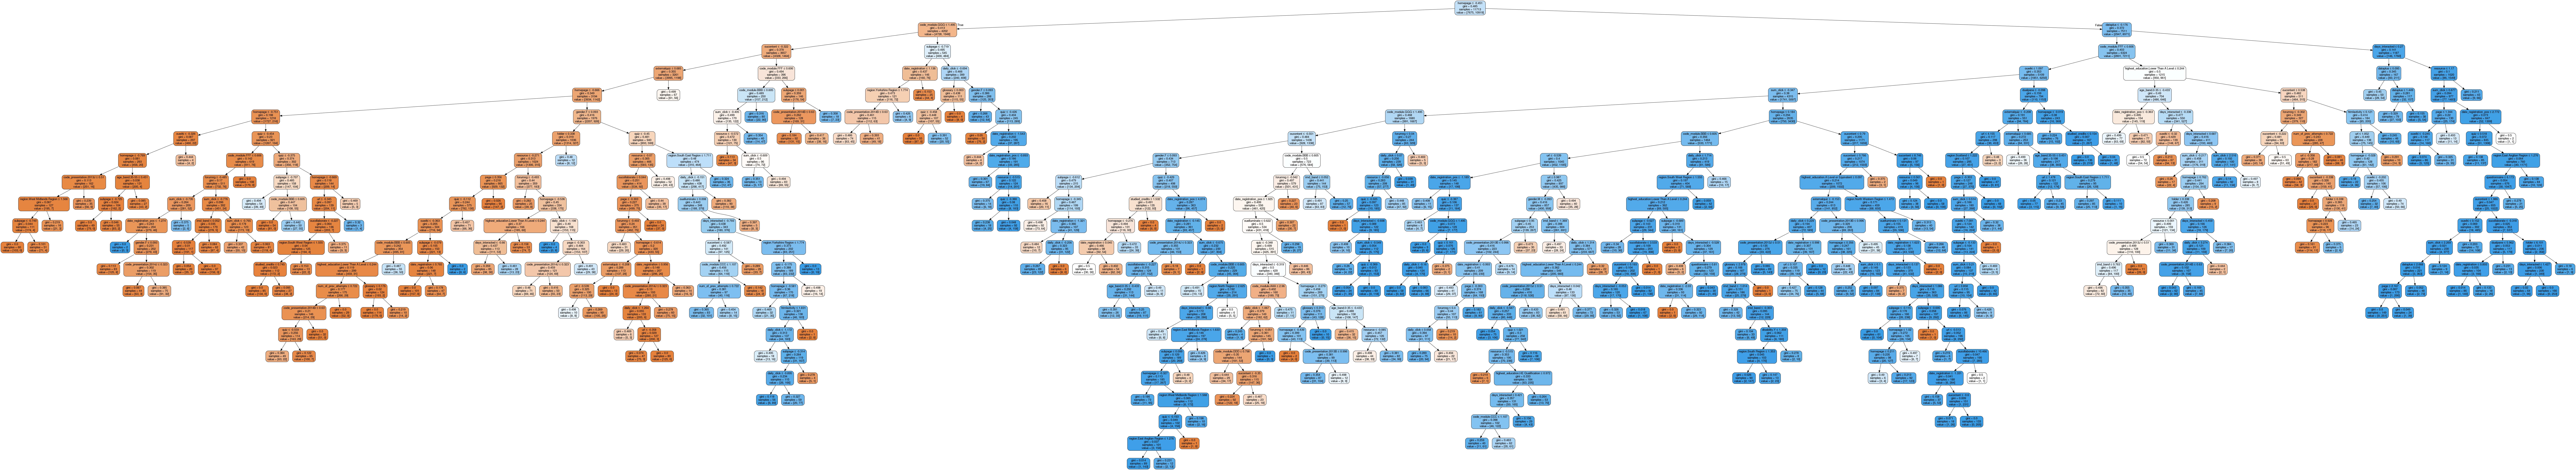

In [29]:
tree = depths2[7]
print(tree)
# plot the tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, 
                filled=True, rounded=True, special_characters=True)
# print(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
train_X_imp = imputer.transform(X_enc)

In [31]:
from concurrent.futures import ProcessPoolExecutor

def multiproc_iter_func(max_workers, an_iter, func, item_kwarg, **kwargs):
    """
    A helper functions that applies a function to each item in an iterable using
    multiple processes. 'item_kwarg' is the keyword argument for the item in the
    iterable that we pass to the function.
    """
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        future_results = [executor.submit(func, **{item_kwarg: item}, **kwargs)
                          for item in an_iter]

        results = [future.result() for future in future_results]
        
    return results

In [32]:
train_expl_list = multiproc_iter_func(N_JOBS, train_X_imp, 
                                      eli5.explain_prediction_df, 'doc',
                                      estimator=estimator, 
                                      feature_names=features)

In [33]:
# datac = pd.read_csv("Open_Univ_Data_Final_merged.csv")
train_expl_df = pd.concat(train_expl_list)

In [34]:
train_expl_df.head(60)

target                                        feature    weight   value
0        1                                         <BIAS>  0.591344    1.00
1        1                                days_interacted  0.065619   40.00
2        1                                      sum_click  0.045260  934.00
3        1                                            url  0.035015    5.00
4        1                                       homepage  0.034962  138.00
5        1                                        forumng  0.034151  193.00
6        1                                      oucontent  0.028102  553.00
7        1                                       dataplus  0.027386    0.00
8        1                                code_module.FFF  0.005440    0.00
9        1                                        subpage  0.005403   32.00
10       1                                  oucollaborate  0.005032    0.00
11       1                                       imd_band  0.004637   10.00
12       1           highest_education.Lower Than A Level  0.004153    0.00
13       1                                       glossary  0.001358    0.00
14       1                        code_presentation.2013B  0.001154    0.00
15       1                                       gender.F  0.000992    0.00
16       1                                code_module.DDD  0.000988    0.00
17       1                           num_of_prev_attempts  0.000825    0.00
18       1             highest_education.HE Qualification  0.000651    1.00
19       1                                  sharedsubpage  0.000481    0.00
20       1                        code_presentation.2014B  0.000419    0.00
21       1                                 age_band.35-55  0.000279    0.00
22       1                                   htmlactivity  0.000181    0.00
23       1                           region.London Region  0.000173    0.00
24       1                                code_module.CCC  0.000121    0.00
25       1                                   disability.N  0.000111    1.00
26       1                                 repeatactivity  0.000107    0.00
27       1                    region.North Western Region  0.000104    0.00
28       1                                   disability.Y  0.000091    0.00
29       1                     region.East Anglian Region  0.000064    1.00
30       1                                   region.Wales  0.000051    0.00
31       1                            region.North Region  0.000033    0.00
32       1              highest_education.No Formal quals  0.000033    0.00
33       1                    region.West Midlands Region  0.000026    0.00
34       1  highest_education.Post Graduate Qualification  0.000016    0.00
35       1                                region.Scotland -0.000031    0.00
36       1                                code_module.GGG -0.000093    0.00
37       1                       region.South West Region -0.000098    0.00
38       1                            region.South Region -0.000147    0.00
39       1                        code_presentation.2014J -0.000469    0.00
40       1        highest_education.A Level or Equivalent -0.000760    0.00
41       1                                code_module.EEE -0.000788    0.00
42       1                                   ouelluminate -0.001553    0.00
43       1                                code_module.BBB -0.001605    0.00
44       1                                       dualpane -0.002104    0.00
45       1                                       gender.M -0.002192    1.00
46       1                        code_presentation.2013J -0.002295    1.00
47       1                                           page -0.002604    0.00
48       1                                         folder -0.003254    0.00
49       1                                       resource -0.004753   13.00
50       1                                   externalquiz -0.005520    0.00
51       1                                  question

In [35]:
test_X_imp = imputer.transform(X_test_enc)
test_expl_list = multiproc_iter_func(N_JOBS, test_X_imp, 
                                     eli5.explain_prediction_df, 'doc', 
                                     estimator=estimator,
                                     feature_names=features)
test_expl_df = pd.concat(test_expl_list)
test_expl_df.head(60)

target                                        feature    weight  value
0        1                                         <BIAS>  0.591344    1.0
1        1                                days_interacted  0.051491   16.0
2        1                                      oucontent  0.042275    3.0
3        1                                      sum_click  0.038708  264.0
4        1                                            url  0.029070    6.0
5        1                                        forumng  0.028978  156.0
6        1                                       homepage  0.027479   51.0
7        1                                       dataplus  0.026192    0.0
8        1                                        subpage  0.010836   19.0
9        1                                  oucollaborate  0.005819    0.0
10       1           highest_education.Lower Than A Level  0.004366    0.0
11       1                                code_module.FFF  0.003242    0.0
12       1                                code_module.BBB  0.003012    1.0
13       1                                       imd_band  0.002992    6.0
14       1        highest_education.A Level or Equivalent  0.001144    1.0
15       1                                       dualpane  0.000979    0.0
16       1                                code_module.DDD  0.000892    0.0
17       1                           num_of_prev_attempts  0.000799    0.0
18       1                        code_presentation.2013B  0.000782    0.0
19       1                        code_presentation.2014B  0.000528    0.0
20       1                                  sharedsubpage  0.000331    0.0
21       1                           region.London Region  0.000211    0.0
22       1                                   disability.Y  0.000194    0.0
23       1                                 age_band.35-55  0.000161    0.0
24       1                                   region.Wales  0.000143    0.0
25       1                    region.North Western Region  0.000136    0.0
26       1                                code_module.CCC  0.000121    0.0
27       1                                 repeatactivity  0.000117    0.0
28       1                     region.East Anglian Region  0.000115    0.0
29       1                    region.West Midlands Region  0.000092    0.0
30       1                                 region.Ireland  0.000067    0.0
31       1              highest_education.No Formal quals  0.000063    0.0
32       1                                   disability.N  0.000059    1.0
33       1                                region.Scotland  0.000057    0.0
34       1                            region.North Region  0.000033    0.0
35       1             highest_education.HE Qualification  0.000020    0.0
36       1  highest_education.Post Graduate Qualification  0.000016    0.0
37       1                                   htmlactivity -0.000074    0.0
38       1                                code_module.GGG -0.000093    0.0
39       1                            region.South Region -0.000098    0.0
40       1                       region.South West Region -0.000107    0.0
41       1                                       glossary -0.000468    1.0
42       1                        code_presentation.2014J -0.000586    0.0
43       1                                       gender.M -0.000905    0.0
44       1                                code_module.EEE -0.000990    0.0
45       1                                       gender.F -0.001586    1.0
46       1                                           page -0.001973    0.0
47       1                        code_presentation.2013J -0.002295    1.0
48       1                                         folder -0.002972    0.0
49       1                                   ouelluminate -0.003150    0.0
50       1                                   externalquiz -0.003436    0.0
51       1                                  questionnaire -0.005943    0.0
52       1                   

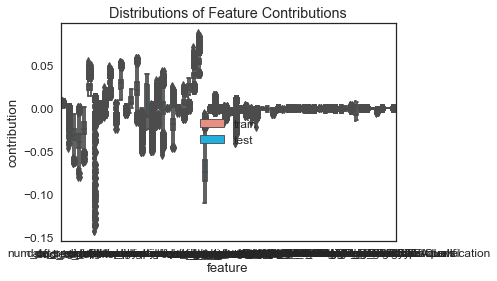

In [42]:
%matplotlib inline
train_expl_df.rename(columns={'weight': 'contribution'}, inplace=True)
test_expl_df.rename(columns={'weight': 'contribution'}, inplace=True)
train_expl_df['data'] = 'train'
test_expl_df['data'] = 'test'


train_test_expl_df = pd.concat([train_expl_df, test_expl_df])
sns.boxplot(x='feature', y='contribution', hue='data', order=features,
            data=train_test_expl_df.loc[train_test_expl_df.feature!=''],
            palette={'train': 'salmon', 
                     'test':'deepskyblue'})
plt.legend(loc=10)
plt.title('Distributions of Feature Contributions');


In [45]:
export_csv = train_expl_df.to_csv(r'./contribution.csv', index = None, header=True)
export_csv1 = test_expl_df.to_csv(r'./contribution_test.csv', index = None, header=True)
